# Two Body Analysis

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The files containing the planetary data are made in a specific way which means they must be read in a specific way. The Euler vs Velocity Verlet files only have the x,y,z,vx,vy and vz values for each timestep with the corresponding headers.

In [3]:
df = pd.read_csv(f"Output/EulerVsVverlet/earthSun_vverlet3.txt", delim_whitespace=True)
df

,x,y,z,vx,vy,vz
0,1.000000,0.006283,0.0,-0.019738,6.283061,0.0
1,0.999961,0.012566,0.0,-0.059212,6.282689,0.0
2,0.999882,0.018849,0.0,-0.098682,6.282069,0.0
3,0.999763,0.025130,0.0,-0.138145,6.281201,0.0
4,0.999605,0.031411,0.0,-0.177600,6.280086,0.0
...,...,...,...,...,...,...
4995,0.999581,-0.026008,0.0,0.183167,6.281053,0.0
4996,0.999744,-0.019727,0.0,0.143693,6.281956,0.0
4997,0.999868,-0.013445,0.0,0.104216,6.282611,0.0
4998,0.999953,-0.007162,0.0,0.064738,6.283018,0.0


All other files have the planet names and masses on the first line, followed by the positions and velocities of all the planets that were moving during the simulation (that means exluding the sun for most simulations)

In [12]:
namemass = pd.read_csv("Output/Circular_exponent2.100000.txt", header=None, delim_whitespace=True, nrows=1)
print(namemass)
df = pd.read_csv("Output/Circular_exponent2.100000.txt", header=None, delim_whitespace=True, skiprows=1)
print(df)

       0         1    2    3
0  Earth  0.000003  Sun  1.0
              0         1    2         3         4    5
0      1.000000  0.000000  0.0  0.000000  6.283185  0.0
1      1.000000  0.000628  0.0 -0.001974  6.283184  0.0
2      1.000000  0.001257  0.0 -0.005922  6.283180  0.0
3      0.999999  0.001885  0.0 -0.009870  6.283174  0.0
4      0.999998  0.002513  0.0 -0.013817  6.283165  0.0
...         ...       ...  ...       ...       ...  ...
99995  1.000019 -0.004556  0.0  0.026656  6.282947  0.0
99996  1.000021 -0.003927  0.0  0.022708  6.282964  0.0
99997  1.000023 -0.003299  0.0  0.018761  6.282978  0.0
99998  1.000025 -0.002671  0.0  0.014813  6.282990  0.0
99999  1.000026 -0.002042  0.0  0.010866  6.282999  0.0

[100000 rows x 6 columns]


## Euler vs Velocity Verlet

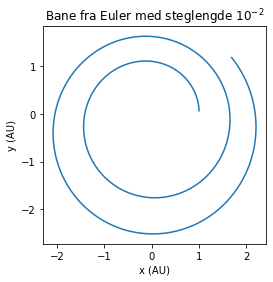

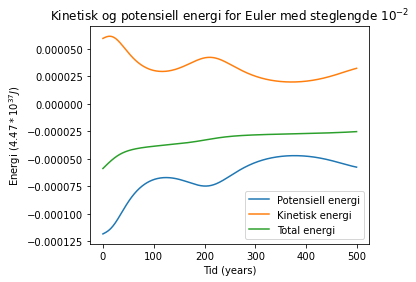

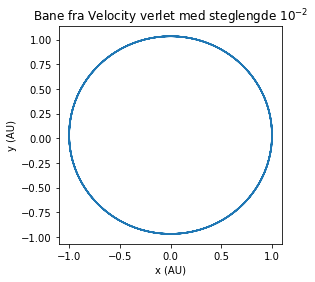

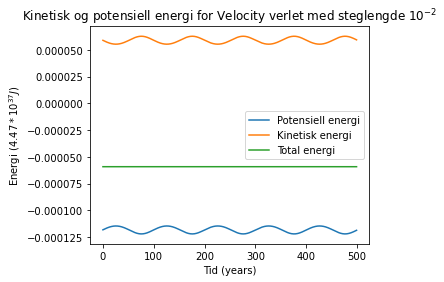

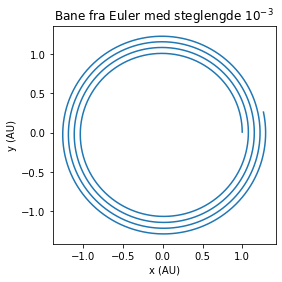

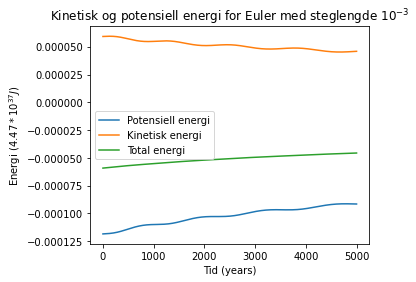

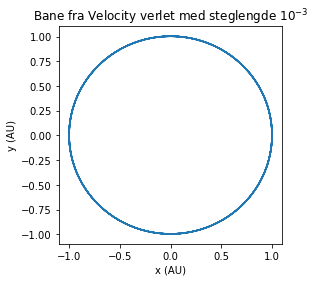

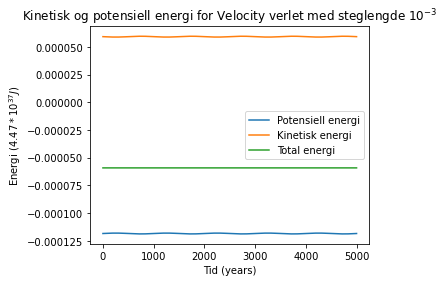

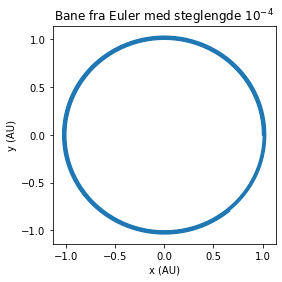

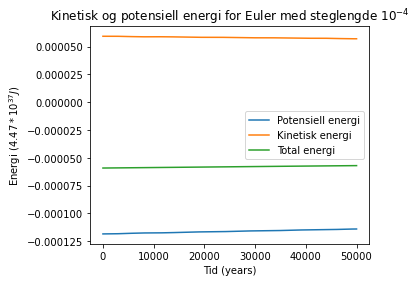

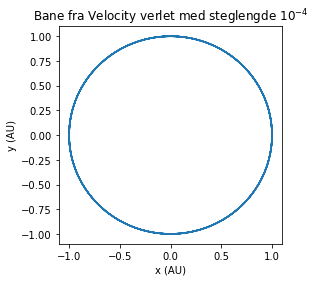

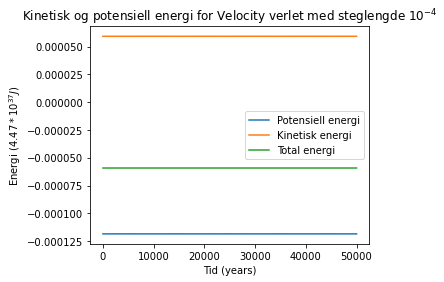

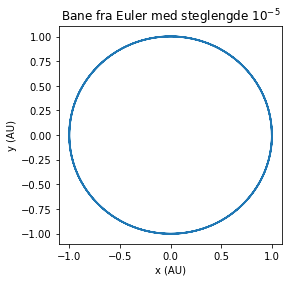

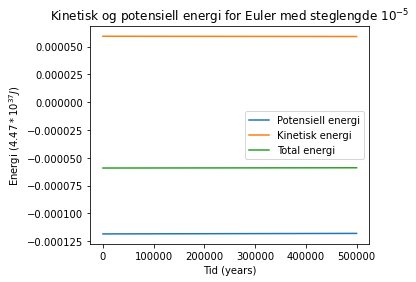

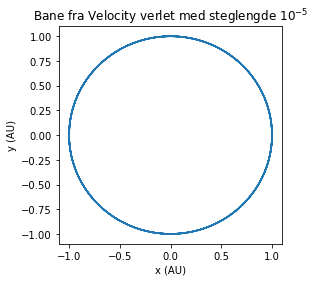

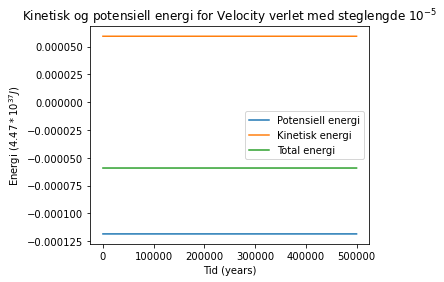

In [28]:
folderPath = "Output/EulerVsVverlet"
for i in [2, 3, 4, 5]:
    for solver in ["euler", "vverlet"]:
        df = pd.read_csv(f"{folderPath}/earthSun_{solver}{i}.txt", delim_whitespace=True)

        x = np.array(df["x"])
        y = np.array(df["y"])
        z = np.array(df["z"])
        vx = np.array(df["vx"])
        vy = np.array(df["vy"])
        vz = np.array(df["vz"])

        plt.figure(figsize = (4, 4))
        if solver == "vverlet":
            solver = "Velocity verlet"
        plt.title(f"Bane fra {solver.capitalize()} med steglengde $10^{{{-i}}}$")
        plt.xlabel("x (AU)")
        plt.ylabel("y (AU)")
        plt.plot(x, y)
        
        plt.figure(figsize = (5, 4))
        plt.title(f"Kinetisk og potensiell energi for {solver.capitalize()} med steglengde $10^{{{-i}}}$")
        pot = -(4 * np.pi**2 * 3E-6) / (x**2 + y**2 + z**2)**0.5
        kin = 0.5 * 3E-6 * (vx**2 + vy**2 + vz**2)
        plt.plot(pot, label="Potensiell energi")
        plt.plot(kin, label="Kinetisk energi")
        plt.plot(pot + kin, label="Total energi")
        plt.xlabel("Tid (years)")
        plt.ylabel(r"Energi ($4.47*10^{37}J$)")
        plt.legend()

    plt.show()

## Change of exponent for circular orbit

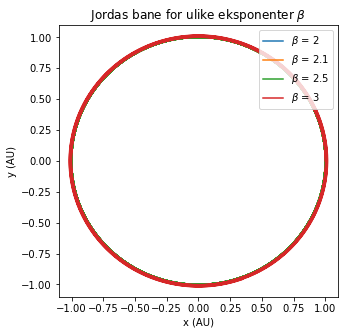

In [6]:
plt.figure(figsize=(5, 5))
filloc = "Output/Circular_exponent"
for filename, exponent in zip(["2.000000.txt", "2.100000.txt", "2.500000.txt", "3.000000.txt"], ["2", "2.1", "2.5", "3"]):
    df = pd.read_csv(filloc + filename, header=None, delim_whitespace=True, skiprows = 1)
    plt.plot(df[0], df[1], label=fr"$\beta$ = {exponent}")
    
plt.title(r"Jordas bane for ulike eksponenter $\beta$")
plt.xlabel("x (AU)")
plt.ylabel("y (AU)")
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.legend(loc="upper right")
plt.show()

## Change of exponent for elliptical orbit

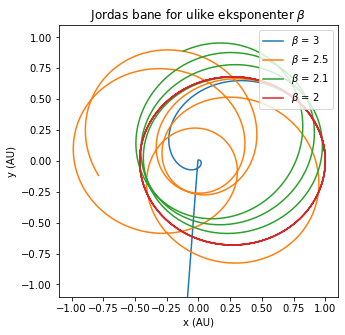

In [31]:
plt.figure(figsize=(5, 5))
filloc = "Output/Elliptical_exponent"
for filename, exponent in zip(["3.000000.txt", "2.500000.txt", "2.100000.txt", "2.000000.txt"], ["3", "2.5", "2.1", "2"]):
    df = pd.read_csv(filloc + filename, header=None, delim_whitespace=True, skiprows = 1)
    plt.plot(df[0], df[1], label=fr"$\beta$ = {exponent}")
    
plt.title(r"Jordas bane for ulike eksponenter $\beta$")
plt.xlabel("x (AU)")
plt.ylabel("y (AU)")
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.legend(loc="upper right")
plt.show()

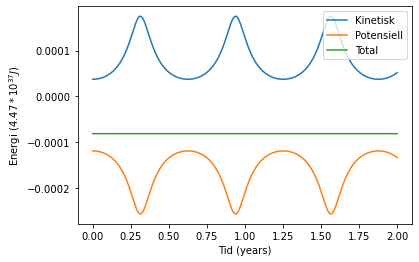

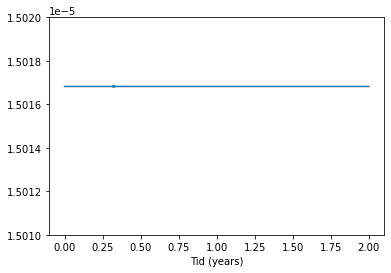

In [35]:
# beta = 2
filename = "Output/Elliptical_exponent2.000000.txt"
nameMass = np.array(pd.read_csv(filename, header=None, delim_whitespace=True, nrows=1))[0]
mass = nameMass[1]
df = pd.read_csv(filename, header=None, delim_whitespace=True, skiprows = 1)
n = len(df[0])
kinetic = np.zeros(n)
potential = np.zeros(n)
angular = np.zeros(n)
for i in range(n):
    x, y, z = df[0][i], df[1][i], df[2][i]
    vx, vy, vz = df[3][i], df[4][i], df[5][i]
    kinetic[i] = 0.5 * mass * (vx**2 + vy**2 + vz**2)
    potential[i] = -4 * np.pi**2 * mass / (x**2 + y**2 + z**2)**0.5
    angular[i] = mass * np.linalg.norm(np.cross([x, y, z], [vx, vy, vz]))
plt.plot(np.linspace(0, 2, len(df[0])), kinetic, label="Kinetisk")
plt.plot(np.linspace(0, 2, len(df[0])), potential, label="Potensiell")
plt.plot(np.linspace(0, 2, len(df[0])), kinetic + potential, label="Total")
plt.legend(loc="upper right")
plt.xlabel("Tid (years)")
plt.ylabel(r"Energi ($4.47*10^{37}J$)")
plt.show()
plt.plot(np.linspace(0, 2, len(df[0])), angular)
plt.ylim(1.501E-5, 1.502E-5)
plt.xlabel("Tid (years)")
plt.show()

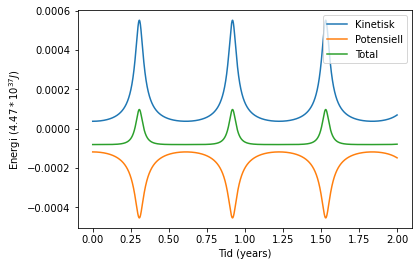

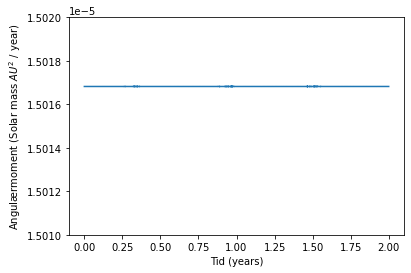

In [36]:
# beta = 2.5
nameMass = np.array(pd.read_csv("Output/Elliptical_exponent2.500000.txt", header=None, delim_whitespace=True, nrows=1))[0]
mass = nameMass[1]
df = pd.read_csv("Output/Elliptical_exponent2.500000.txt", header=None, delim_whitespace=True, skiprows = 1)
n = len(df[0])
kinetic = np.zeros(n)
potential = np.zeros(n)
angular = np.zeros(n)
for i in range(n):
    x, y, z = df[0][i], df[1][i], df[2][i]
    vx, vy, vz = df[3][i], df[4][i], df[5][i]
    kinetic[i] = 0.5 * mass * (vx**2 + vy**2 + vz**2)
    potential[i] = -4 * np.pi**2 * mass / (x**2 + y**2 + z**2)**0.5
    angular[i] = mass * np.linalg.norm(np.cross([x, y, z], [vx, vy, vz]))
plt.plot(np.linspace(0, 2, len(df[0])), kinetic, label="Kinetisk")
plt.plot(np.linspace(0, 2, len(df[0])), potential, label="Potensiell")
plt.plot(np.linspace(0, 2, len(df[0])), kinetic + potential, label="Total")
plt.legend(loc="upper right")
plt.xlabel("Tid (years)")
plt.ylabel(r"Energi ($4.47*10^{37}J$)")
plt.show()
plt.plot(np.linspace(0, 2, len(df[0])), angular)
plt.ylim(1.501E-5, 1.502E-5)
plt.xlabel("Tid (years)")
plt.ylabel("Angulærmoment (Solar mass $AU^2$ / year)")
plt.show()

## Earth Escape Velocity

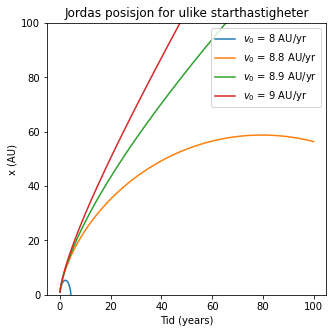

In [39]:
plt.figure(figsize=(5, 5))
filloc = "Output/Escape_velocity"
for filename, exponent in zip(["8.000000.txt", "8.800000.txt", "8.900000.txt", "9.000000.txt"], ["8", "8.8", "8.9", "9"]):
    df = pd.read_csv(filloc + filename, header=None, delim_whitespace=True, skiprows = 1)
    plt.plot(np.linspace(0, 100, len(df[0])), df[0], label=fr"$v_0$ = {exponent} AU/yr")
    
plt.title(r"Jordas posisjon for ulike starthastigheter")
plt.xlabel("Tid (years)")
plt.ylabel("x (AU)")
plt.legend(loc="upper right")
plt.ylim(0,100)
plt.show()